## Análisis Exploratorio de Datos (EDA) - Películas

#### 1. Importación de librerías y carga de datos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Cargar el dataset
df = pd.read_csv('movies_top_10_percent.csv')

2. Visión general de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4538 entries, 0 to 4537
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4538 non-null   int64  
 1   title                  4538 non-null   object 
 2   tagline                4538 non-null   object 
 3   overview               4538 non-null   object 
 4   runtime                4538 non-null   float64
 5   original_language      4538 non-null   object 
 6   genres                 4538 non-null   object 
 7   belongs_to_collection  4538 non-null   int64  
 8   status                 4538 non-null   object 
 9   release_date           4538 non-null   object 
 10  release_year           4538 non-null   int64  
 11  popularity             4538 non-null   float64
 12  vote_count             4538 non-null   float64
 13  vote_average           4538 non-null   float64
 14  production_companies   4462 non-null   object 
 15  prod

In [4]:
df.describe()

,id,runtime,belongs_to_collection,release_year,popularity,vote_count,vote_average,revenue,budget,return
count,4538.000000,4538.000000,4538.000000,4538.000000,4538.000000,4538.000000,4538.000000,4.538000e+03,4.538000e+03,4.538000e+03
mean,73010.983914,107.883208,0.249008,2000.169017,13.243859,805.047598,6.368532,8.968172e+07,2.812194e+07,2.377827e+02
std,111192.723513,25.317364,0.432486,16.258623,14.308158,1323.633283,0.887432,1.773789e+08,4.314828e+07,1.512738e+04
min,5.000000,0.000000,0.000000,1925.000000,8.337560,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8390.500000,94.000000,0.000000,1994.000000,9.520921,102.000000,5.800000,0.000000e+00,0.000000e+00,0.000000e+00
50%,14159.000000,104.000000,0.000000,2005.000000,11.065399,305.000000,6.400000,1.925592e+07,1.000000e+07,8.448576e-01
75%,81851.500000,118.750000,0.000000,2012.000000,13.378439,900.750000,7.000000,9.939739e+07,3.700000e+07,3.194480e+00
max,463906.000000,877.000000,1.000000,2017.000000,547.488298,14075.000000,10.000000,2.787965e+09,3.800000e+08,1.018619e+06


In [5]:
df['runtime'].describe()

count    4538.000000
mean      107.883208
std        25.317364
min         0.000000
25%        94.000000
50%       104.000000
75%       118.750000
max       877.000000
Name: runtime, dtype: float64

In [16]:
# Filtrar las películas con duración 0 y obtener sus títulos
peliculas_duracion_cero = df[df['runtime'] == 0]['title']

# Imprimir los títulos
print("Películas con duración 0 minutos:")
for titulo in peliculas_duracion_cero:
    print(titulo)

# Imprimir el total de películas encontradas
print(f"\nTotal de películas con duración 0: {len(peliculas_duracion_cero)}")

Películas con duración 0 minutos:
Thor: Ragnarok
Justice League
The Bar
No manches Frida
Night Guards
The Marine 5: Battleground
LEGO DC Super Hero Girls: Brain Drain

Total de películas con duración 0: 7


In [18]:
# Filtrar las películas con duración 0 y obtener sus títulos
peliculas_duracion_cero = df[df['runtime'] > 300]['title']

# Imprimir los títulos
print("Películas con duración mayor a 300 minutos:")
for titulo in peliculas_duracion_cero:
    print(titulo)

# Imprimir el total de películas encontradas
print(f"\nTotal de películas con duración mayor a 300 minutos: {len(peliculas_duracion_cero)}")

Películas con duración mayor a 300 minutos:
Taken
The Stand
Gangs of Wasseypur

Total de películas con duración mayor a 300 minutos: 3


In [19]:
# Reemplazar 0 con la mediana
median_runtime = df['runtime'].median()
df['runtime'] = df['runtime'].replace(0, median_runtime)

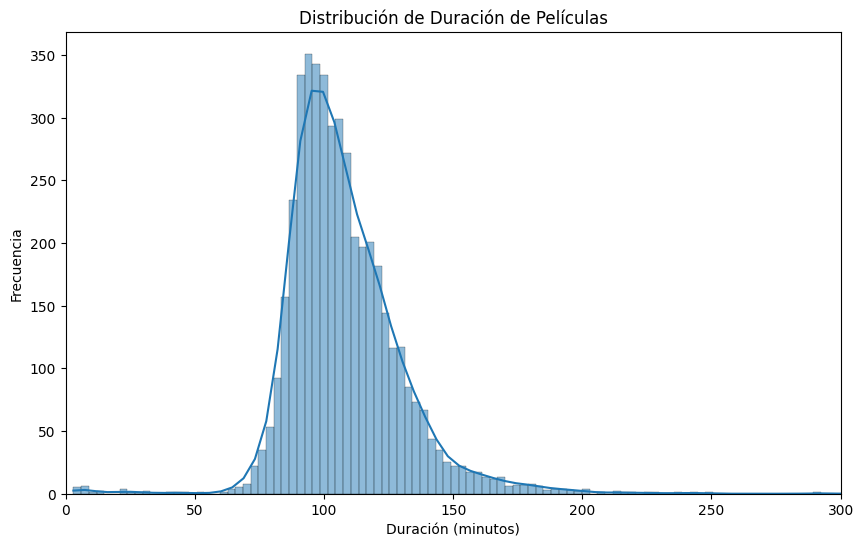

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], kde=True)
plt.title('Distribución de Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.xlim(0, 300)  # Agregar el límite en el eje X
plt.show()

#### 3. Análisis de variables numéricas
##### 3.1 Distribución de presupuestos

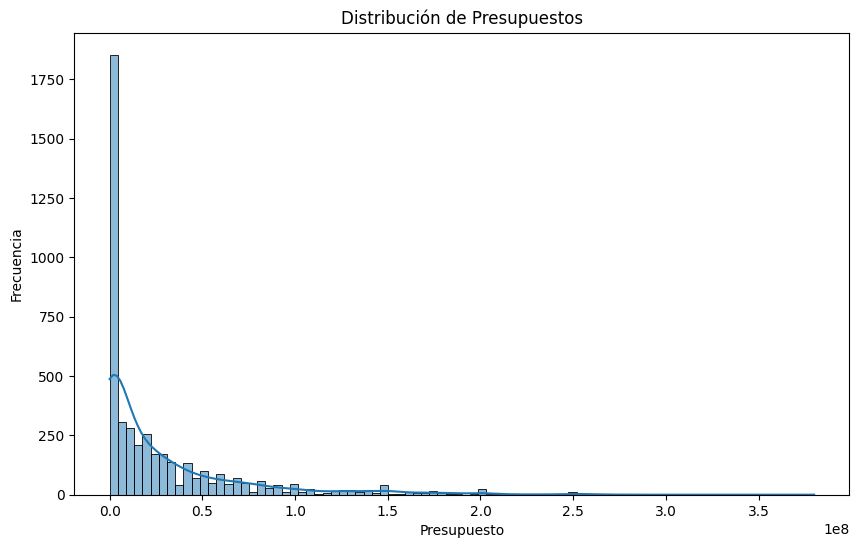

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['budget'], kde=True)
plt.title('Distribución de Presupuestos')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

In [32]:
# Contar películas con presupuesto cero
peliculas_presupuesto_cero = df[df['budget'] == 0]
cantidad_presupuesto_cero = len(peliculas_presupuesto_cero)

print(f"Número de películas con presupuesto cero: {cantidad_presupuesto_cero}")
print(f"Porcentaje de películas con presupuesto cero: {(cantidad_presupuesto_cero / len(df)) * 100:.2f}%")

# Estadísticas adicionales
presupuestos_no_cero = df[df['budget'] > 0]['budget']
print(f"\nEstadísticas de presupuestos (excluyendo cero):")
print(presupuestos_no_cero.describe())

Número de películas con presupuesto cero: 1395
Porcentaje de películas con presupuesto cero: 30.74%

Estadísticas de presupuestos (excluyendo cero):
count    3.143000e+03
mean     4.060368e+07
std      4.670554e+07
min      1.000000e+00
25%      9.000000e+06
50%      2.500000e+07
75%      5.500000e+07
max      3.800000e+08
Name: budget, dtype: float64


##### 3.2 Relación entre presupuesto y recaudación

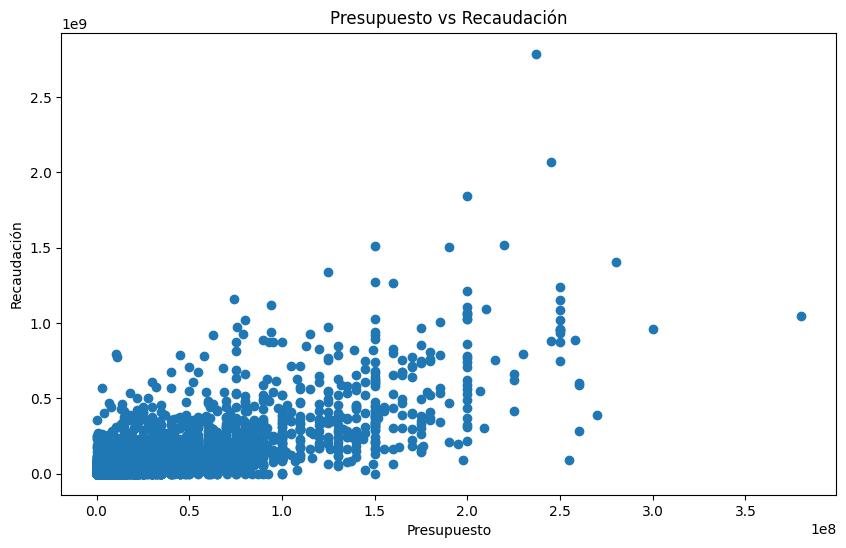

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'])
plt.title('Presupuesto vs Recaudación')
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación')
plt.show()

#### 4. Análisis de variables categóricas
##### 4.1 Géneros más comunes

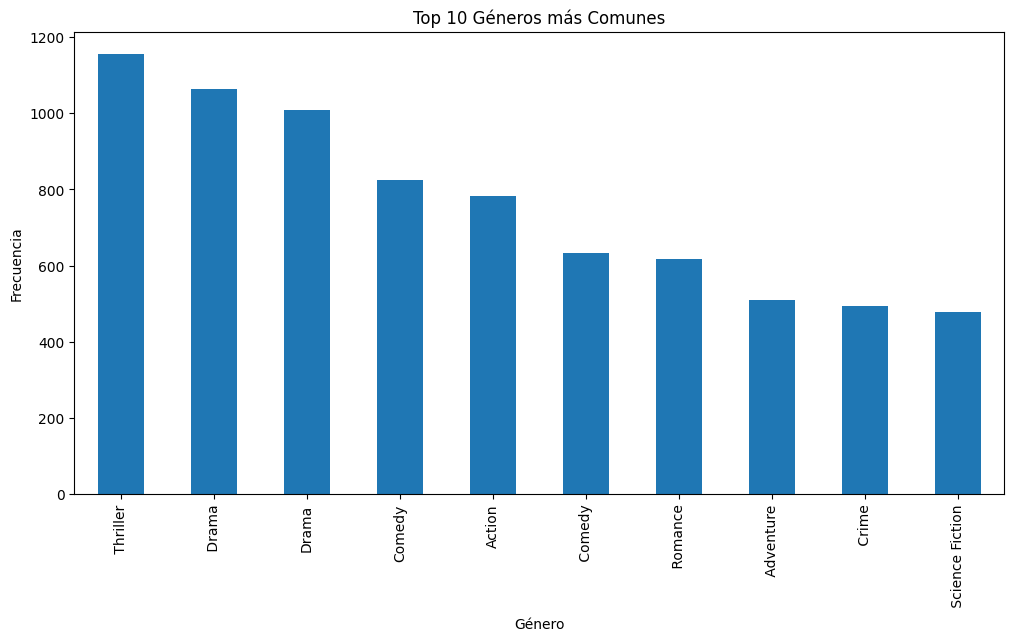

In [24]:
genres = df['genres'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
genres[:10].plot(kind='bar')
plt.title('Top 10 Géneros más Comunes')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

#### 5. Análisis temporal
##### 5.1 Tendencia de películas por año

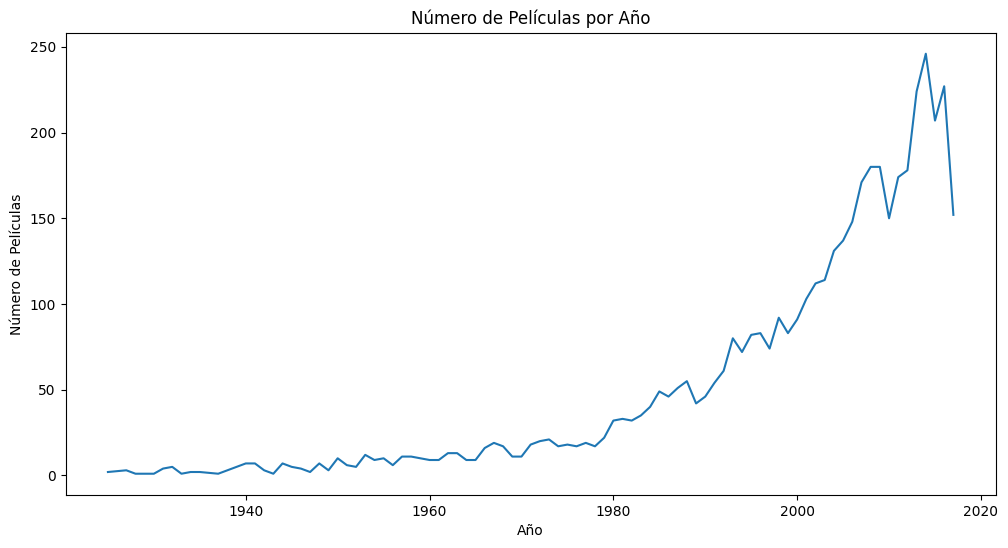

In [25]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot()
plt.title('Número de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.show()

##### 6. Nube de palabras de títulos

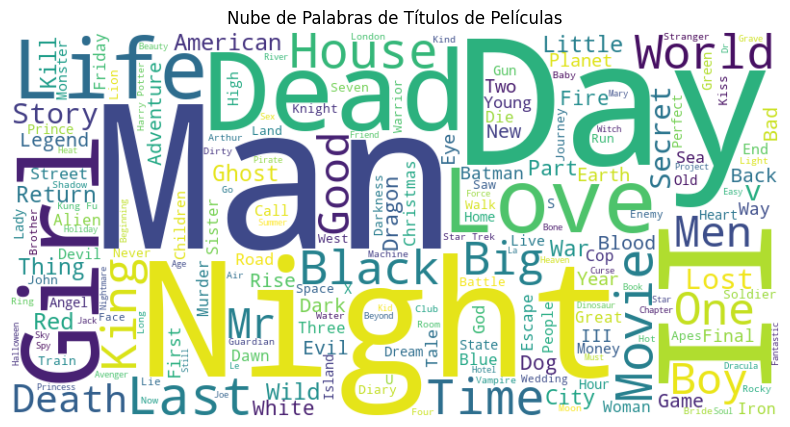

In [26]:
text = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos de Películas')
plt.show()

#### 7. Análisis de outliers
##### 7.1 Boxplot de presupuestos

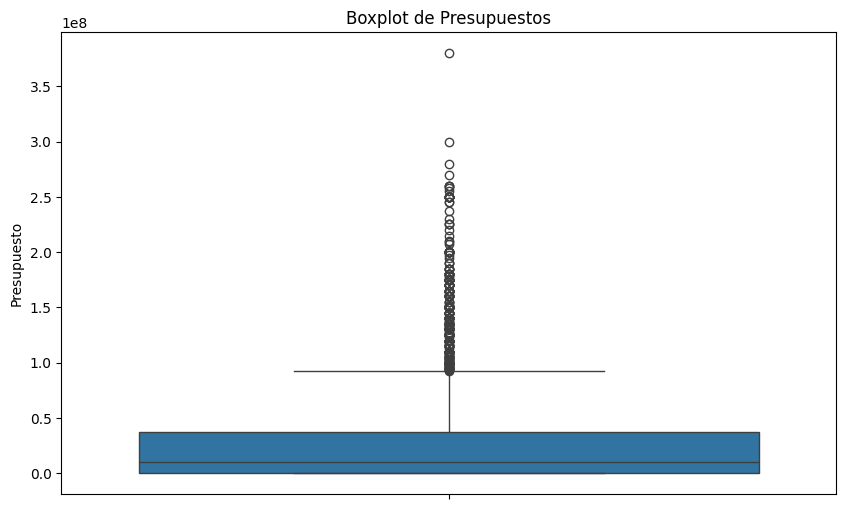

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['budget'])
plt.title('Boxplot de Presupuestos')
plt.ylabel('Presupuesto')
plt.show()

#### 8. Correlaciones

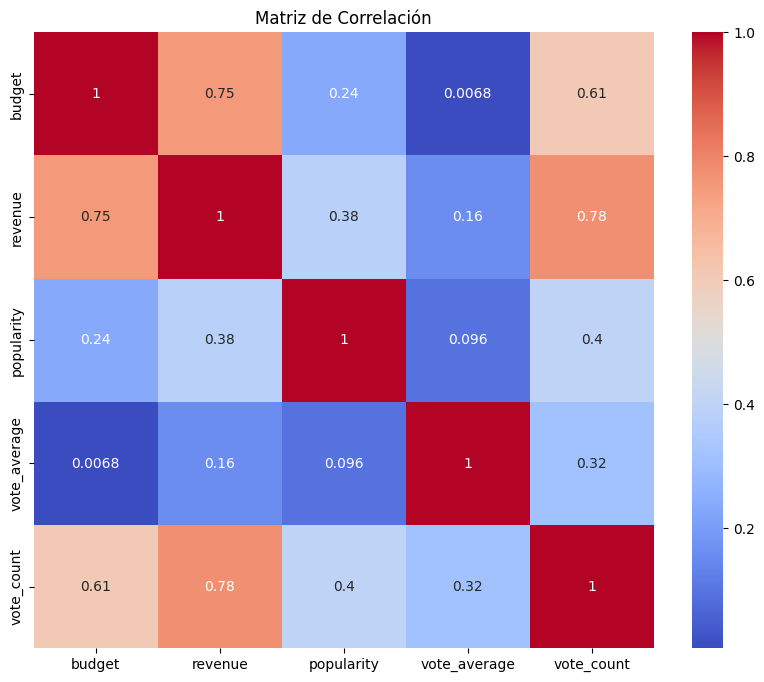

In [28]:
correlation_matrix = df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

De la matriz de correlación se puede observar que existe una correlación positiva significativa con respecto de:

* El presupuesto (budget) y la recaudación (revenue). A mayor presupuesto, mayor recaudación.
* El presupuesto (budget) y la cantidad de votos (vote_count). A mayor presupuesto, mayor cantidad de votos.

#### 9. Conclusiones
